In [1]:
import pandas as pd
import spacy
import re
nlp = spacy.load('en_core_web_sm')

import sys
path = '/Users/mdunford/data_science/fake-news-predictor/src'
if path not in sys.path:
    sys.path.append(path)
    

from string_process import string_process
from tokenize_news import tokenize_string

import logging
logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fake = pd.read_csv('/Users/mdunford/data_science/fake-news-predictor/data/Fake.csv')
true = pd.read_csv('/Users/mdunford/data_science/fake-news-predictor/data/True.csv')
true['class'] = 0
fake['class'] = 1

data = pd.concat([true, fake])
data = data.reset_index(drop=True)
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [3]:
data['title']

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
44893    McPain: John McCain Furious That Iran Treated ...
44894    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896    How to Blow $700 Million: Al Jazeera America F...
44897    10 U.S. Navy Sailors Held by Iranian Military ...
Name: title, Length: 44898, dtype: object

/Users/mdunford/opt/anaconda3/envs/tweet_project/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='length', ylabel='Count'>

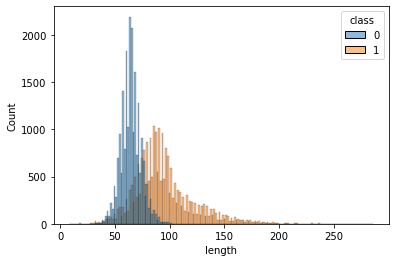

In [5]:
dat = data[['title','class']]
dat['length'] = dat['title'].apply(len)
sns.histplot(data=dat, x='length', hue='class')

In [184]:
dat

0        64
1        64
2        60
3        59
4        69
         ..
23476    61
23477    81
23478    85
23479    67
23480    81
Name: title, Length: 44898, dtype: int64

## Build model

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


df = data.sample(n=1000)
X = df['title']
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


def make_pipe(vectorizer, transformer, classifier):
    pipe = Pipeline([
        ('vect', vectorizer),
        ('trans', transformer),
        ('clf', classifier)
    ])
    return pipe

In [7]:
vectorizer = CountVectorizer(
    preprocessor=string_process,
    tokenizer=tokenize_string,
    max_df=0.8,
    max_features=2000
)

tfidf = TfidfTransformer()

clf = MultinomialNB()

pipe = make_pipe(vectorizer, tfidf, clf)

In [8]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, max_features=2000,
                                 preprocessor=<function string_process at 0x7ff672115d40>,
                                 tokenizer=<function tokenize_string at 0x7ff672115950>)),
                ('trans', TfidfTransformer()), ('clf', MultinomialNB())])

In [9]:
predictions = pipe.predict(X_test)

In [10]:
accuracy_score(predictions, y_test)

NameError: name 'accuracy_score' is not defined

## Model assessment

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [241]:
accuracy_score(predictions, y_test)

0.9018181818181819

In [242]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       769
           1       0.90      0.91      0.91       881

    accuracy                           0.90      1650
   macro avg       0.90      0.90      0.90      1650
weighted avg       0.90      0.90      0.90      1650



In [243]:
confusion_matrix(predictions, y_test)

array([[684,  85],
       [ 77, 804]])

In [217]:
sample_ = data.sample(1)
title = sample_['title']
truth = sample_['class']

print('News article:\n\n')
print(sample_['title'].values[0])
print('\n')
print('Ground truth: '+str(truth))
if pipe.predict([sample_['title'].values[0]])==1:
    print('Verdict: FAKE NEWS!!!!')
else:
    print('Verdict: Real news')

News article:


U.N. expert says torture persists at Guantanamo Bay; U.S. denies


Ground truth: 12351    0
Name: class, dtype: int64
Verdict: Real news


## Neural Net

In [ ]:
import tensorflow as tf

def make_model(input_dims=6, num_units=12):
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(units=num_units, input_dim=input_dims, activation='relu'))
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
model = make_model(input_dims=6, num_units=12)

In [33]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
670/670 [==============================] - 0s 281us/sample - loss: 7.4817 - acc: 0.5358
Epoch 2/10
670/670 [==============================] - 0s 240us/sample - loss: 7.4817 - acc: 0.5358
Epoch 3/10
670/670 [==============================] - 0s 226us/sample - loss: 7.4817 - acc: 0.5358
Epoch 4/10
670/670 [==============================] - 0s 225us/sample - loss: 7.4817 - acc: 0.5358s - loss: 7.2531 - acc: 0.550
Epoch 5/10
670/670 [==============================] - 0s 218us/sample - loss: 7.4817 - acc: 0.5358
Epoch 6/10
670/670 [==============================] - 0s 210us/sample - loss: 7.4817 - acc: 0.5358
Epoch 7/10
670/670 [==============================] - 0s 230us/sample - loss: 7.4817 - acc: 0.5358
Epoch 8/10
670/670 [==============================] - 0s 220us/sample - loss: 7.4817 - acc: 0.5358
Epoch 9/10
670/670 [==============================] - 0s 228us/sample - loss: 7.4817 - acc: 0.5358
Epoch 10/10
670/670 [==============================] - 0s 226us/sample - loss: 7